# Filtracja bilateralna

## Konwolucja obrazu z filtrem o zadanych współczynnikach

Splot (konwolucję) obrazu wejściowego $I$ z filtrem $\psi$ dla ustalonego punktu obrazu $\mathbf{x}$ można przedstawić następująco:

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||)I(\mathbf{p})
\tag{1}
\end{equation}

gdzie:
- $\hat{I}$ jest obrazem wynikowym (przefiltrowanym),
- $W_N = \sum_y \psi(y)$ jest parametrem normalizującym współczynniki filtra $\psi$,
- $||\cdot||$ jest odległością między punktami obrazu $\mathbf{x}$ i $\mathbf{p}$ według ustalonej metryki (np. norma $L_2$). Uwaga, proszę pamiętać, że zarówno $\mathbf{x}$, jak i $\mathbf{p}$ to współrzędne przestrzenne,
- $\eta(\mathbf{x})$ jest otoczeniem punktu $\mathbf{x}$.

Funkcja $\psi$ decyduje o charakterze filtracji. Dla filtru Gaussowskiego:

\begin{equation}
\psi(y) = G_{\delta_s}(y)
\tag{2}
\end{equation}

gdzie: $G_{\delta_s}(y)$ jest funkcją Gaussa z parametrem skali $\delta_s$.

Opisaną powyżej filtrację realizowaliśmy w ramach ćwiczenia "Przetwarzanie wstępne. Filtracja kontekstowa."

## Filtracja bilateralna

Wadą klasycznego splotu jest brak adaptacji współczynników filtra do lokalnego otoczenia $\eta(\mathbf{x})$ filtrowanego punktu $\mathbf{x}$.
Oznacza to wykorzystanie tych samych współczynników filtra $\psi$ niezależnie od tego czy otoczenie jest względnie jednorodne lub zawiera krawędzie obiektów (w tym przypadku dochodzi do "rozmywania" krawędzi).
Filtracja bilateralna uwzględnia lokalne otoczenie filtrowanego punktu, w ten sposób, że parametry filtra zmieniają się w zależności od "wyglądu" otoczenia.


Współczynniki filtra obliczane są na podstawie odległości filtrowanego punktu $\mathbf{x}$ od każdego punktu otoczenia $\mathbf{p}$ w dziedzinie przestrzennej obrazu (tak jak przy typowym filtrze np. Gaussa) oraz odległości punktów w przeciwdziedzinie obrazu (np. na podstawie różnicy w jasności pikseli dla obrazu w odcieniach szarości):

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||) \gamma(|I(\mathbf{p}) - I(\mathbf{x})|) I(\mathbf{p})
\tag{3}
\end{equation}
gdzie:
- $W_N$ jest współczynnikiem normalizującym filtr,
- $\gamma$ jest funkcją odległości w przeciwdziedzinie obrazu, np. $\gamma(y)=\exp(-\frac{y^2}{2\delta_r^2})$
- parametr $\delta_r$ jest utożsamiany z poziomem szumu w obrazie i należy go dobrać w sposób empiryczny.

Proszę chwilę zastanowić się nad powyższym równaniem, w szczególności nad funkcją $\gamma$. Proszę wyznaczyć, jaka będzie wartość funkcji dla pikseli podobnych (różnica 0, 1, 2), a skrajnie różnych (255, 200).

##  Realizacja ćwiczenia

### Wczytanie danych

1. Wczytaj dane z pliku *MR_data.mat*. W tym celu wykorzystaj funkcję `loadmat` z pakietu scipy:
        from scipy.io import loadmat
        mat = loadmat('MR_data.mat')

2. Wczytany plik zawiera 5 obrazów: *I_noisefree*, *I_noisy1*, *I_noisy2*, *I_noisy3* oraz *I_noisy4*. Odczytać je można w następujący sposób:
        Input = mat['I_noisy1']

3. Wyświetl wybrany obraz z pliku *MR_data.mat*. Zagadka - co to za obrazowanie medyczne?

--2022-04-21 20:40:51--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/07_Bilateral/MR_data.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1332591 (1.3M) [application/octet-stream]
Saving to: ‘MR_data.mat’

MR_data.mat         100%[===================>]   1.27M  --.-KB/s    in 0.04s   

2022-04-21 20:40:52 (35.7 MB/s) - ‘MR_data.mat’ saved [1332591/1332591]



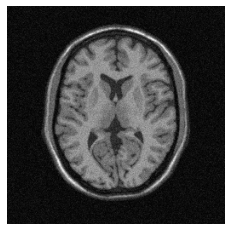

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import loadmat
import math
import os

if not os.path.exists("MR_data.mat") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/07_Bilateral/MR_data.mat --no-check-certificate

#TODO Samodzielna

mat = loadmat('MR_data.mat')

mat1 = mat['I_noisy1']
mat2 = mat['I_noisy2']
mat3 = mat['I_noisy3']
mat4 = mat['I_noisy4']
mat5 = mat['I_noisefree']


plt.imshow(mat1)
plt.gray()
plt.axis('off')
plt.show()


### "Klasyczna" konwolucja

1. Zdefiniuj parametry filtra Gaussowskiego: rozmiar okna i wariancję $\delta_S$.
2. Oblicz współczynniki filtra na podstawie zdefiniowanych parametrów (najprościej w ramach podwójnej pętli for).
2. Sprawdź ich poprawność i zwizualizuj filtr (tak jak w ćwiczeniu pt. "Przetwarzanie wstępne. Filtracja kontekstowa.").
3. Wykonaj kopię obrazu wejściowego: `IConv = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentem tej funkcji są aktualnie przetwarzane okno i współczynniki filtra.
7. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
8. Wyświetl wynik filtracji.
9. Porównaj wynik z obrazem oryginalnym.

In [16]:
#TODO Samodzielna
okno_s = 3
var = 0.8

def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g



def mesh(fun, size):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
  
    ax.plot_surface(X, Y, Z)
    plt.show()



def new_pix (okno, okno_s, var):
  suma = 0
  X,Y = okno.shape
  g = fgaussian(okno_s,var)
  sum_g = 0
  Wn = 0

  for i in range(X):
    for j in range(Y):

      y=np.sqrt(((X//2-X)**2) + ((Y//2-Y)**2))
      gaus= np.exp(-(y**2)/(2*(var**2)))
      suma=suma+gaus*okno[i,j]
      Wn += g[i,j]

    suma=suma/Wn
    return suma



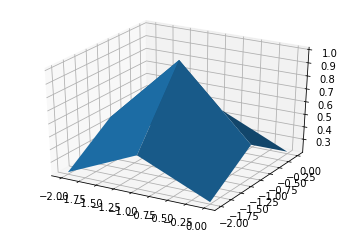

In [14]:
filtr = fgaussian(okno_s, var)
mesh(filtr, okno_s)

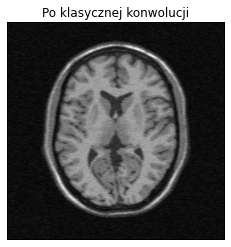

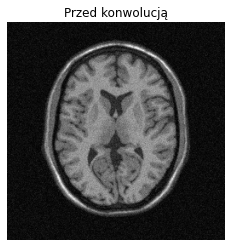

In [17]:
IConv = mat1.copy()
new_Conv = np.zeros((IConv.shape))

X,Y = IConv.shape

for i in range(int(okno_s//2), X - int(okno_s//2)):
  for j in range(int(okno_s//2), Y - int(okno_s//2)):

    okno = IConv[i-int(okno_s//2):i+int(okno_s//2)+1,j-int(okno_s//2):j+int(okno_s//2)+1]  
    new_Conv[i][j] = new_pix(okno, okno_s, var)


  
plt.imshow(new_Conv)
plt.gray()
plt.axis('off')
plt.title("Po klasycznej konwolucji")
plt.show()

plt.imshow(IConv)
plt.gray()
plt.axis('off')
plt.title("Przed konwolucją")
plt.show()



Wynik po klasycznej konwolucji jest bardzej rozmyty - jest to sposób na pozbycie się szumów, jednak cierpi ostrość obrazu

### Filtracja bilateralna

1. Zdefiniuj dodatkowy parametr: wariancję $\delta_R$.
3. Wykonaj kopię obrazu wejściowego: `IBilateral = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentami funkcji są aktualnie przetwarzane okno, współczynniki filtra gaussowskiego (takie same jak wcześniej) i wariancja $\delta_R$.
7. Oblicz odległość w przeciwdziedzinie (dla wartości pikseli).
8. Oblicz funkcję Gaussa dla obliczonych odległości z zadanym parametrem.
9. Wykonaj normalizację obliczonych współczynników.
10. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
11. Wyświetl wynik filtracji.
12. Porównaj wynik z obrazem oryginalnym.

In [29]:
r =   15
IBilateral =  mat1.copy()

def new_pix2(okno,var,r):
    X,Y = okno.shape
    suma=0
    Wn = 0

    for i in range(X):
        for j in range(Y):
            
            y=np.sqrt(((X//2-i)**2)+((Y//2-j)**2))
            gaus= np.exp(-(y**2)/(2*(var**2)))
            
            diff=np.abs(okno[X//2,Y//2] - okno[i,j])
            gaus_diff= np.exp( -(diff**2)/(2*(r**2)) )
            
            suma = suma + gaus*gaus_diff * okno[i,j]
            Wn += gaus*gaus_diff

    return suma/Wn



X,Y = IBilateral.shape

for i in range(int(okno_s//2), X - int(okno_s//2)):
  for j in range(int(okno_s//2), Y - int(okno_s//2)):

    okno =  mat1[i-int(okno_s//2):i+int(okno_s//2)+1,j-int(okno_s//2):j+int(okno_s//2)+1]  
    IBilateral[i][j] = new_pix2(okno, var, r)





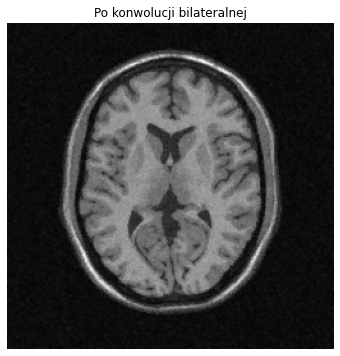

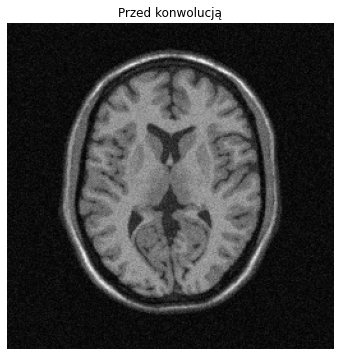

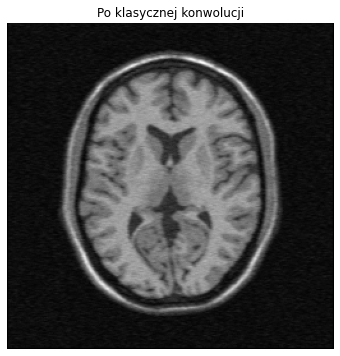

In [32]:
plt.figure(figsize=(6,6))
plt.imshow(IBilateral)
plt.gray()
plt.axis('off')
plt.title("Po konwolucji bilateralnej")
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(mat1)
plt.gray()
plt.axis('off')
plt.title("Przed konwolucją")
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(new_Conv)
plt.gray()
plt.axis('off')
plt.title("Po klasycznej konwolucji")
plt.show()



Ten sposób konwolucji pozwala na zachowanie ostrości przy pozbywaniu się szumów